In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import scipy.io

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size' : 18})

face_images = []
size = (128, 128)
frontalface_cascade = cv2.CascadeClassifier('cascades/data/haarcascade_frontalface_default.xml')
frontalface_alt_cascade = cv2.CascadeClassifier('cascades/data/haarcascade_frontalface_alt.xml')
frontalface_alt2_cascade = cv2.CascadeClassifier('cascades/data/haarcascade_frontalface_alt2.xml')
profileface_cascade = cv2.CascadeClassifier('cascades/data/haarcascade_profileface.xml')
count_non_detectable_face_1 = 0
count_non_detectable_face_2 = 0
count_non_detectable_face_3 = 0
count_non_detectable_face_4 = 0



data_path = os.getcwd()+'/new_dataset/raw'
save_path = os.getcwd()+'/new_dataset/preprocessed'
for name in os.listdir(data_path):
    folder_path = data_path + '/' + name + '/'
    count = 0
    for img in os.listdir(folder_path):
        image_path = folder_path + img
        image = cv2.imread(image_path)
        if image is None:
            continue
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = frontalface_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

        if len(faces) == 0:
            count_non_detectable_face_1 += 1
            faces = frontalface_alt_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

        if len(faces) == 0:
            count_non_detectable_face_2 += 1
            faces = frontalface_alt2_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

        if len(faces) == 0:
            count_non_detectable_face_3 += 1
            faces = profileface_cascade.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5)

        if len(faces) == 0:
            count_non_detectable_face_4 += 1
            print(name+img)

        for x, y, w, h in faces:
            roi = gray_image[y:y+h, x:x+w]  # detect khuôn mặt
            # resize ảnh sau khi đã detect về cùng size
            roi_resized = cv2.resize(roi, size)

            face_images.append(roi_resized)  # thêm ảnh vào X_train

            count = count + 1
            image_save_path = save_path + '/' + name + '/' + str(count) +'.jpg'
            # cv2.imwrite(image_save_path, roi_resized)
    print(name, str(count))
            
face_images = np.array(face_images)
print(count_non_detectable_face_1)
print(count_non_detectable_face_2)
print(count_non_detectable_face_3)
print(count_non_detectable_face_4)


roger_federer1.jpg
roger_federer10.jpg
roger_federer1000.jpg
roger_federer1018.jpg
roger_federer1032.jpg
roger_federer1034.jpg
roger_federer1036.jpg
roger_federer1038.jpg
roger_federer1049.jpg
roger_federer1067.jpg
roger_federer1068.jpg
roger_federer1075.jpg
roger_federer1086.jpg
roger_federer1094.jpg
roger_federer1107.jpg
roger_federer1110.jpg
roger_federer1124.jpg
roger_federer1127.jpg
roger_federer1129.jpg
roger_federer1133.jpg
roger_federer1140.jpg
roger_federer1149.jpg
roger_federer1150.jpg
roger_federer1157.jpg
roger_federer1167.jpg
roger_federer1172.jpg
roger_federer1181.jpg
roger_federer1187.jpg
roger_federer1198.jpg
roger_federer1199.jpg
roger_federer12.jpg
roger_federer1200.jpg
roger_federer1212.jpg
roger_federer25.jpg
roger_federer47.jpg
roger_federer6.jpg
roger_federer8.jpg
roger_federer 257
ronaldo1018.jpg
ronaldo1020.jpg
ronaldo1023.jpg
ronaldo1027.jpg
ronaldo1030.jpg
ronaldo1046.jpg
ronaldo1122.jpg
ronaldo1134.jpg
ronaldo1144.jpg
ronaldo1163.jpg
ronaldo1165.jpg
ronaldo11

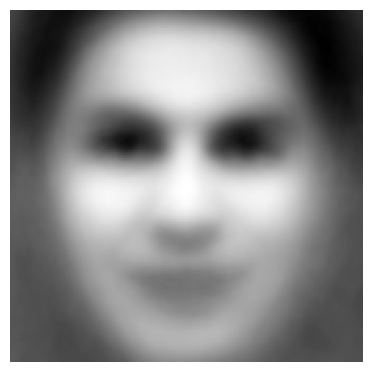

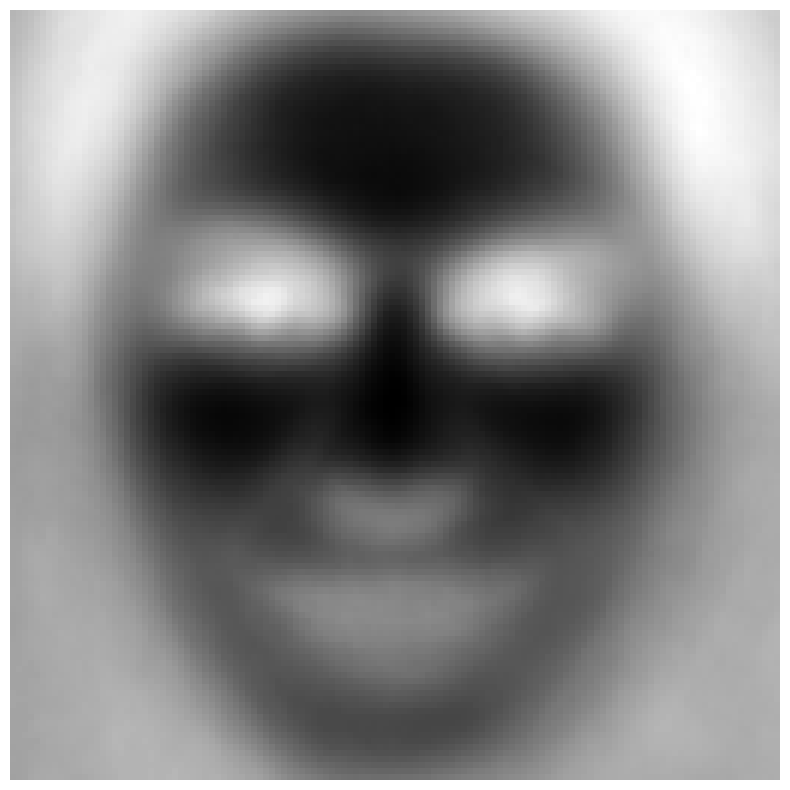

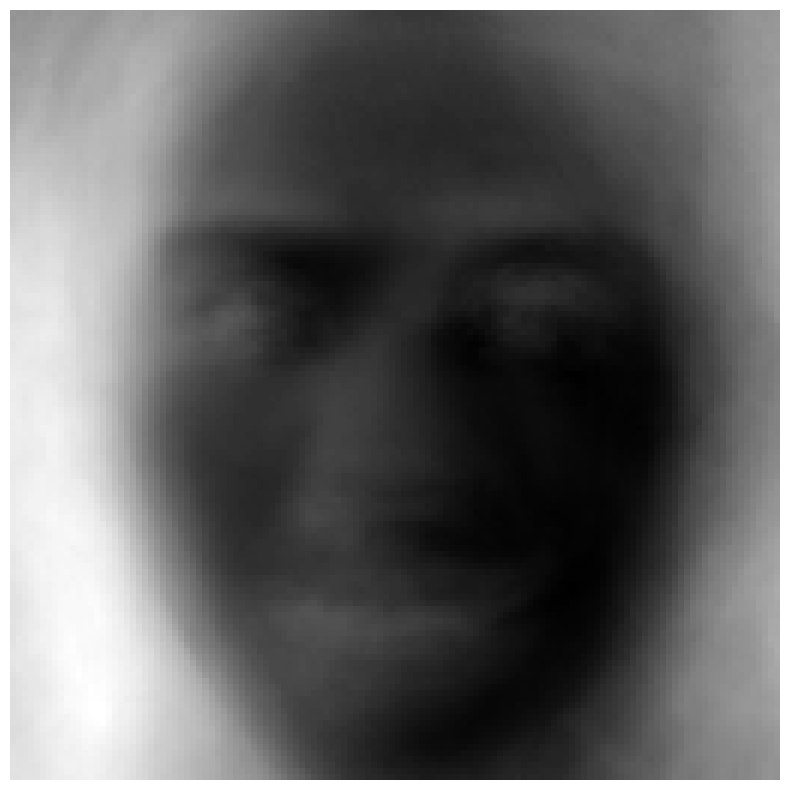

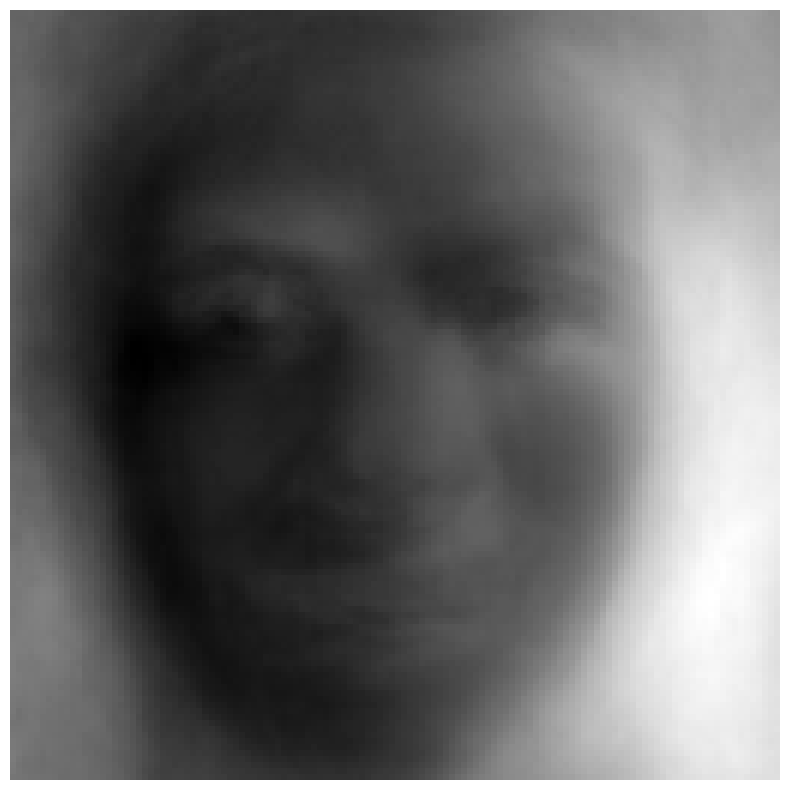

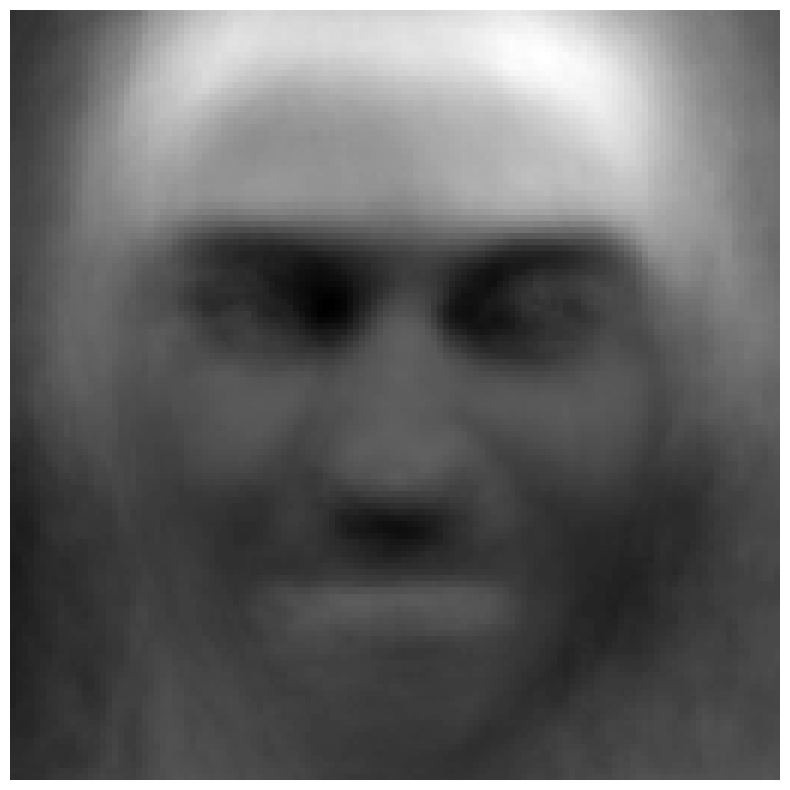

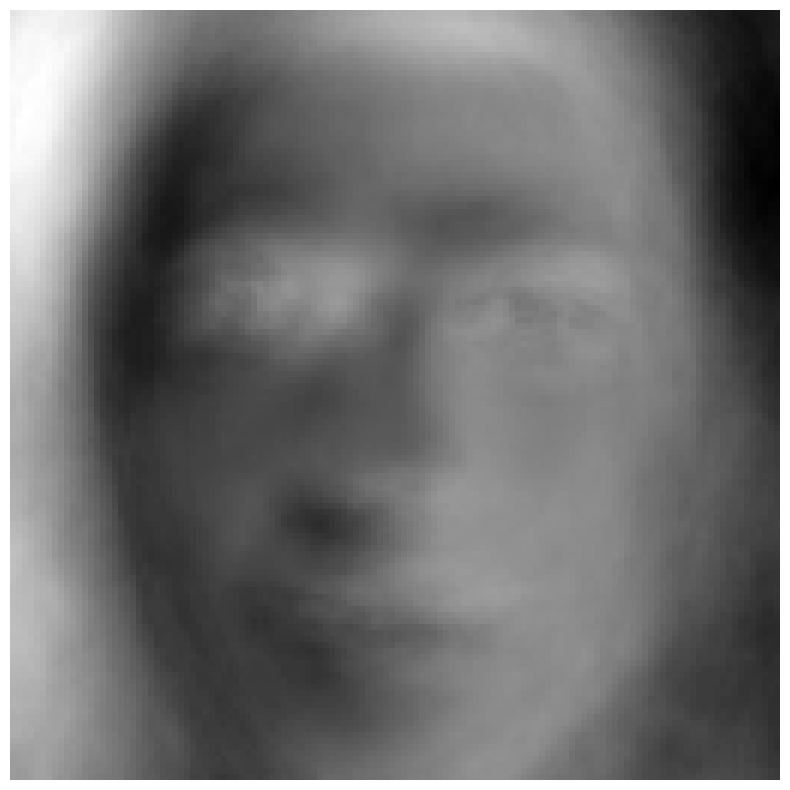

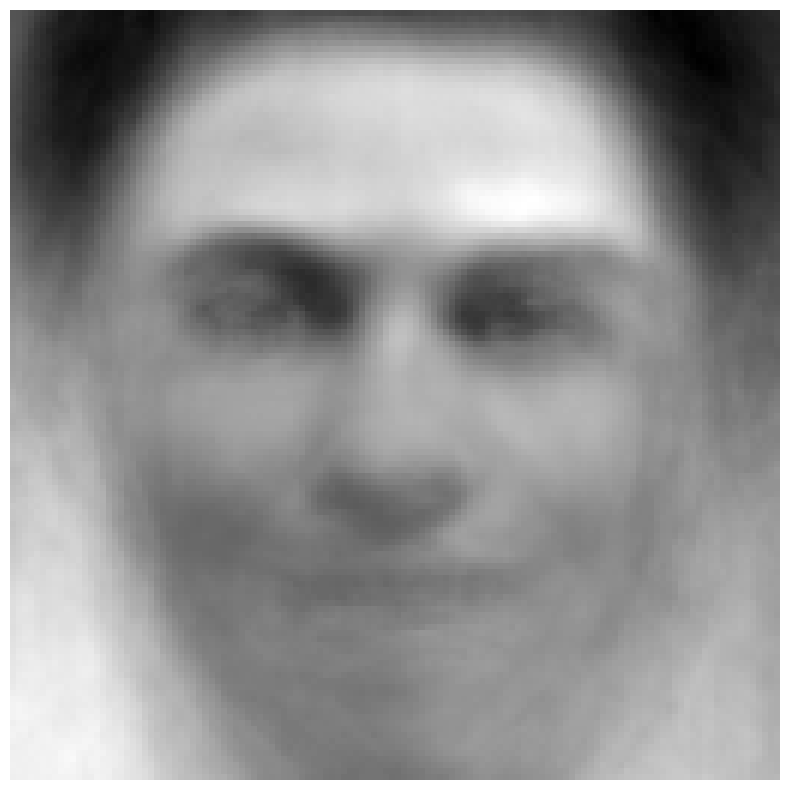

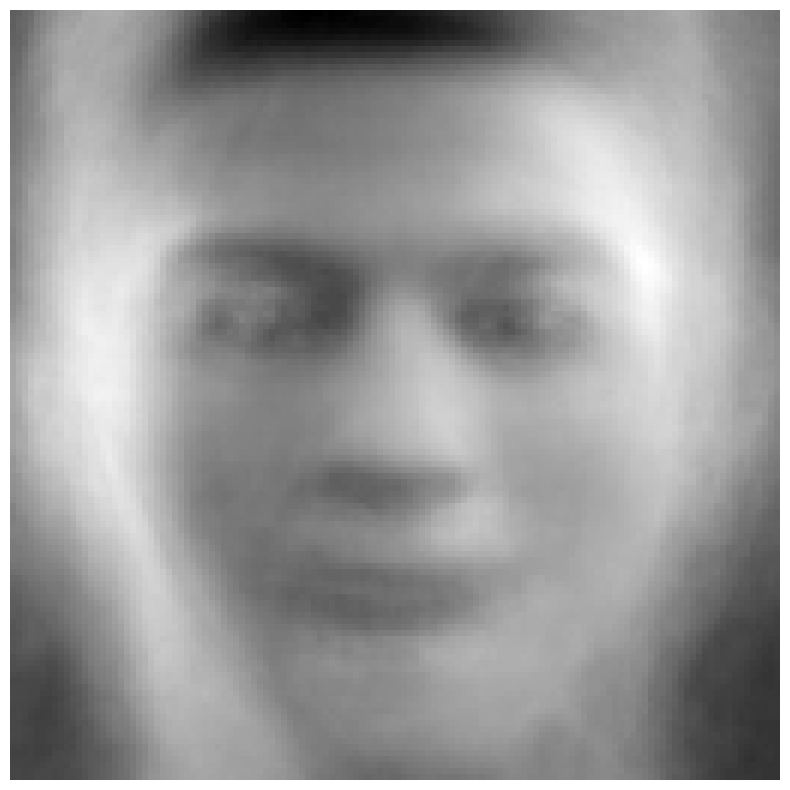

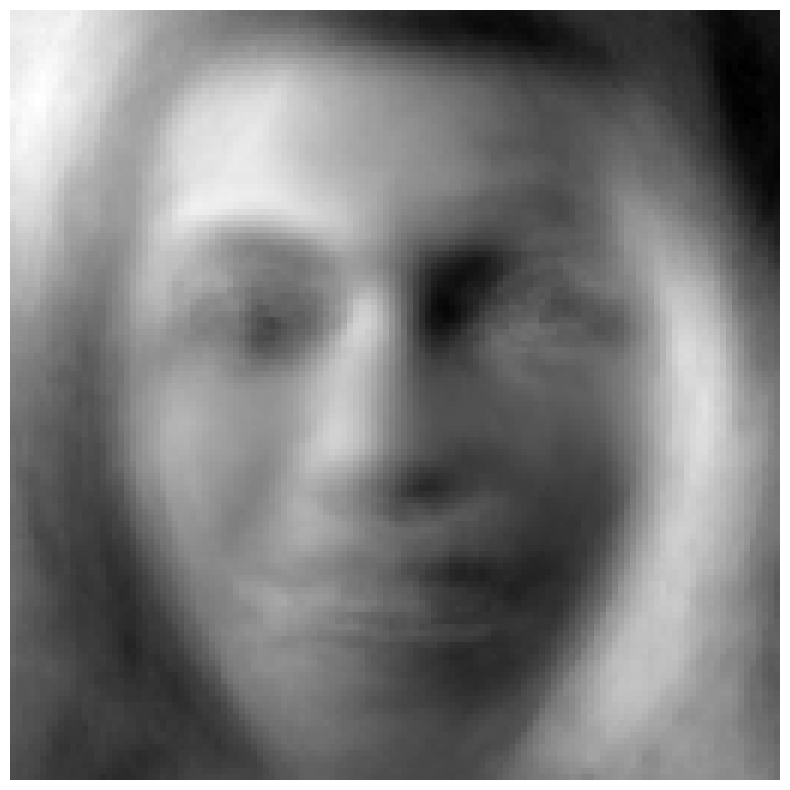

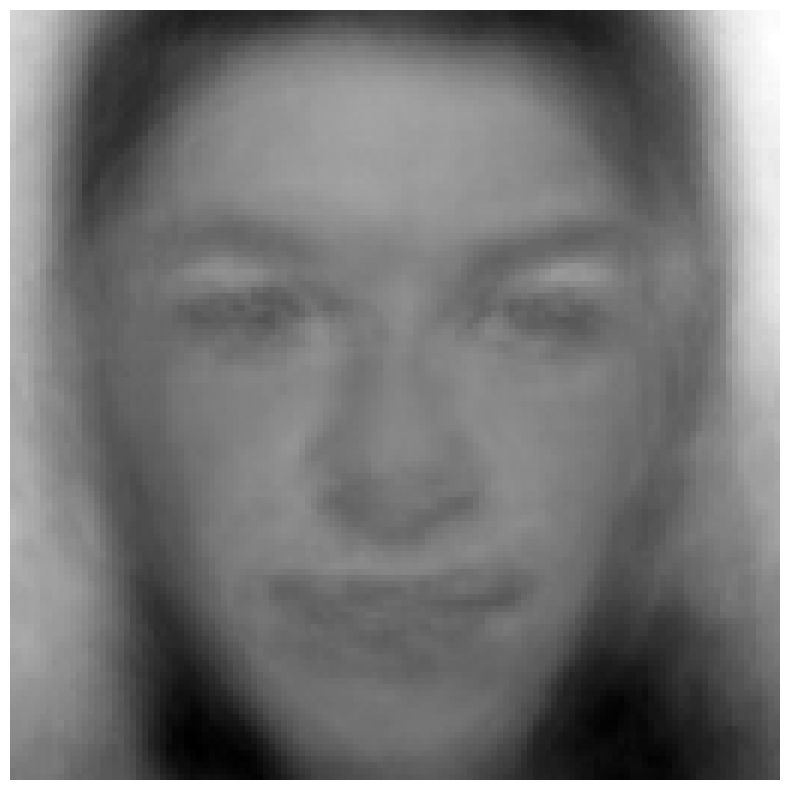

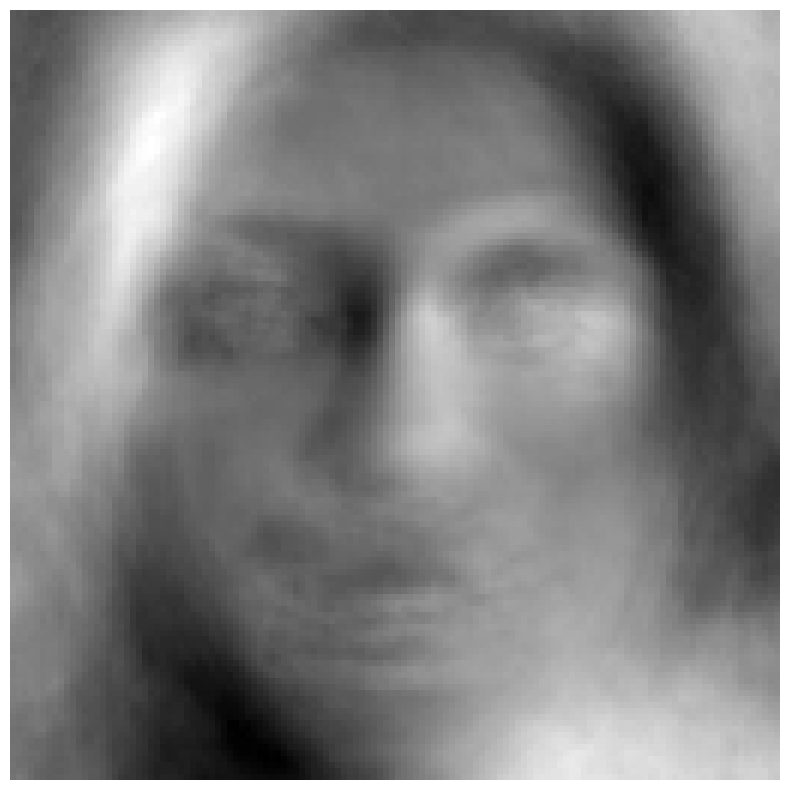

In [6]:
face_images_reshape = np.reshape(face_images, (len(face_images), 128*128))
face_images_reshape = face_images_reshape.T

avg_face = np.mean(face_images_reshape, axis=1)
U, S, VT = np.linalg.svd(face_images_reshape, full_matrices=False)


fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avg_face,size))
img_avg.set_cmap('gray')
plt.axis('off')

for i in range(10):
    plt.figure()
    plt.axis('off')
    plt.imshow(np.reshape(U[:,i],size), cmap='gray')

# plt.show()

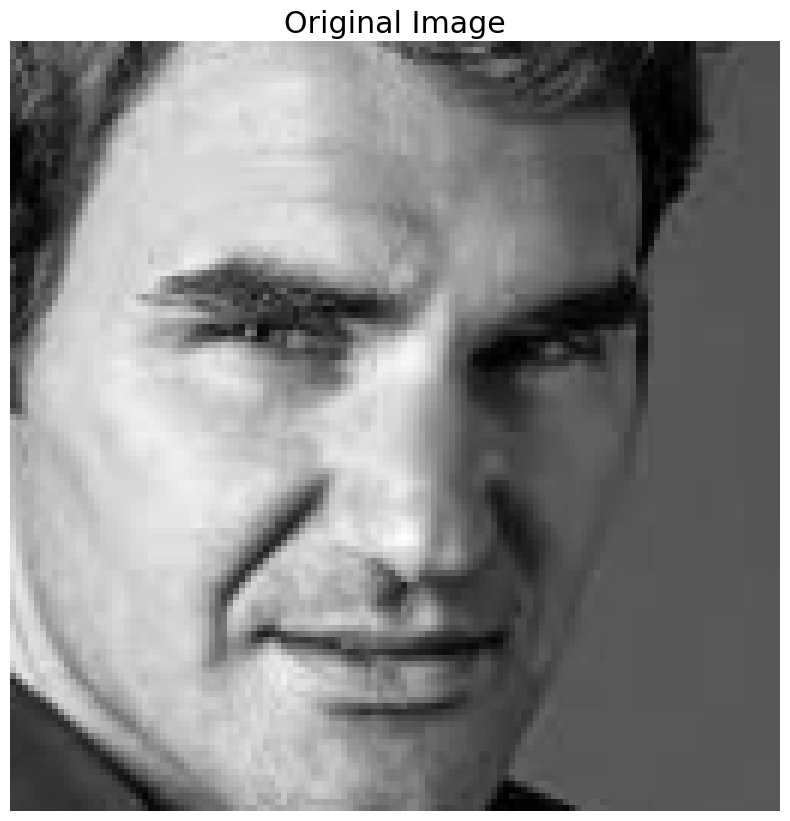

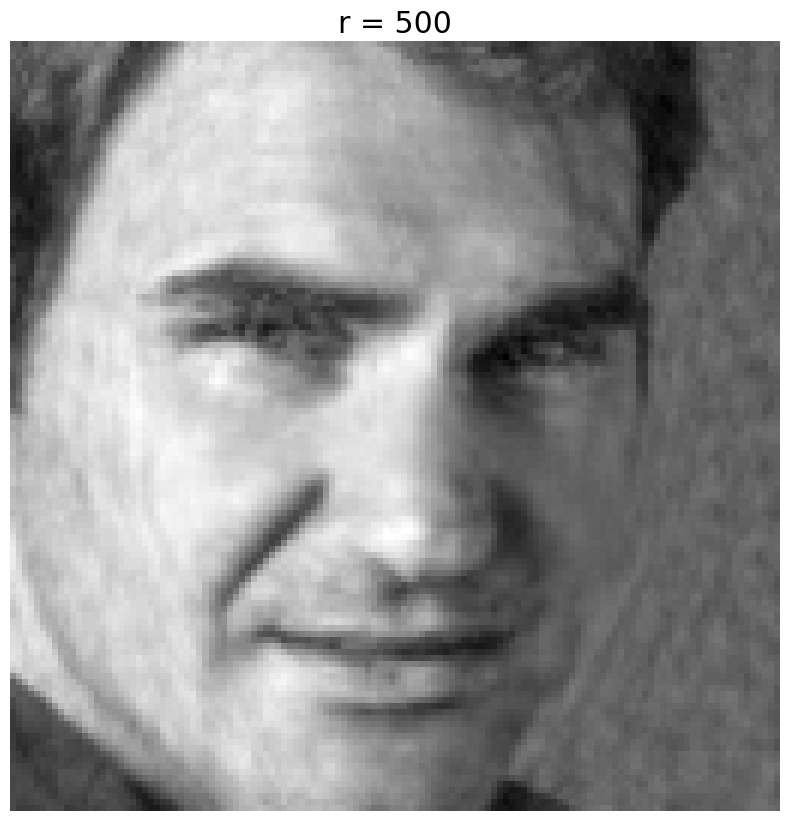

In [7]:
test_face = face_images_reshape[:,0]
plt.imshow(np.reshape(test_face,size))
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

test_face_mean_subtract = test_face - avg_face
r = 500

reconFace = avg_face + U[:,:r]  @ U[:,:r].T @ test_face_mean_subtract
img = plt.imshow(np.reshape(reconFace,size))
img.set_cmap('gray')
plt.title('r = ' + str(r))
plt.axis('off')
plt.show()

(949,)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9196\71053388.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 10**6))


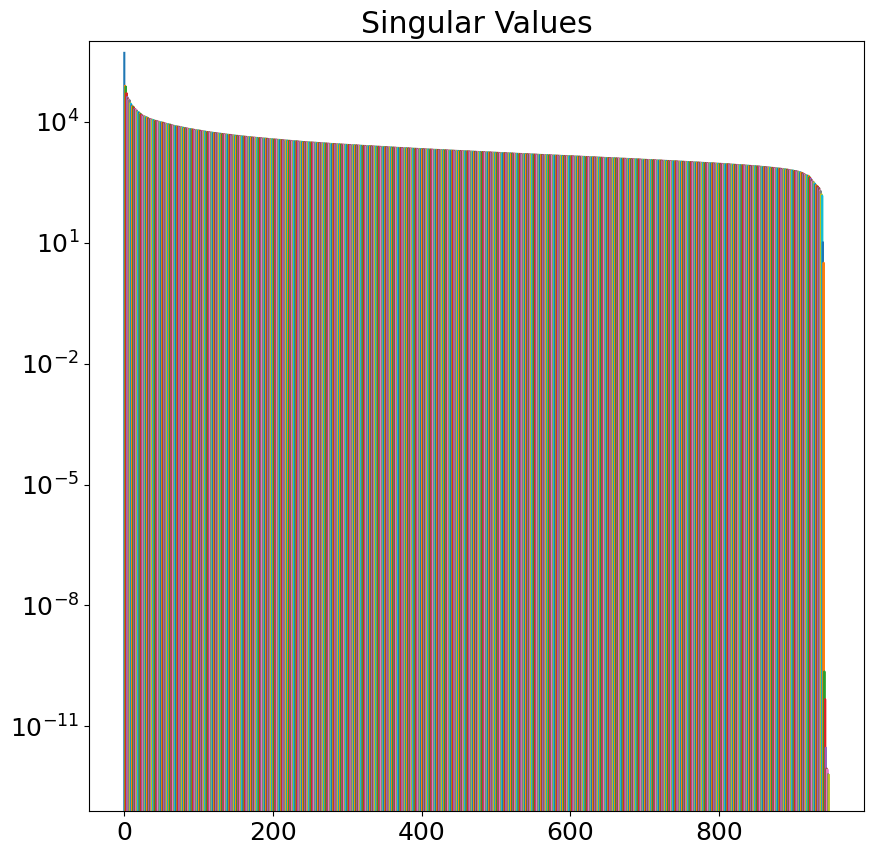

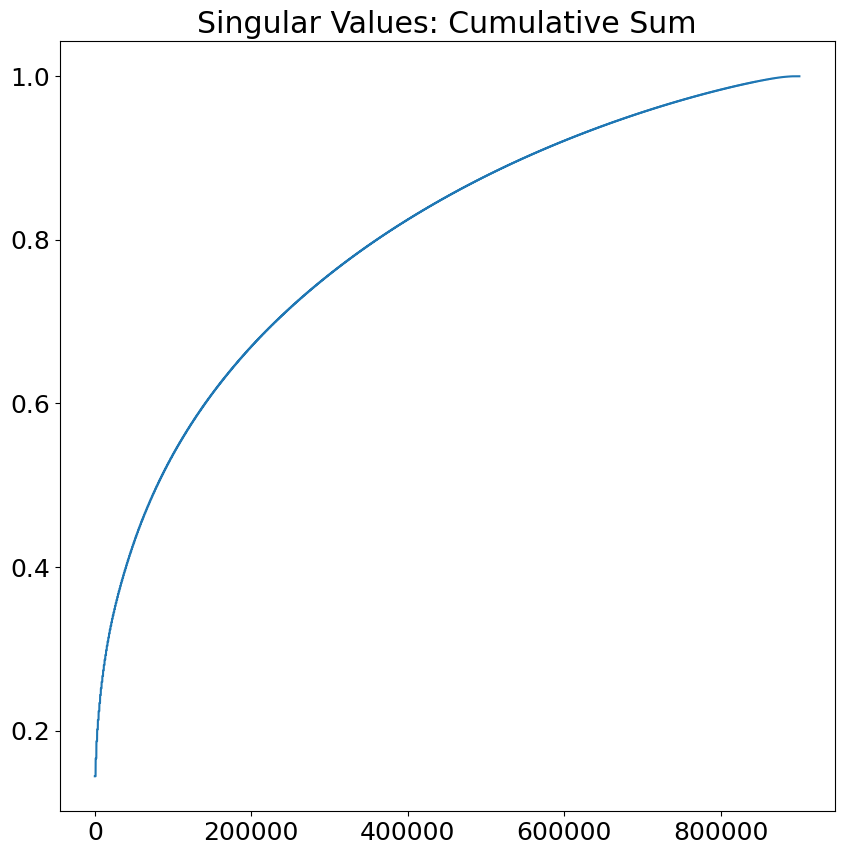

In [8]:
print(S.shape)

plt.figure()
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.ylim((0, 10**6))
plt.show()

plt.figure()
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()